<a href="https://colab.research.google.com/github/dhruvjoshi0905/ml/blob/main/ai_integrated_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 2. Set display options for better visualization
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12


In [ ]:
# 3. Load dummy data for demonstration
# You can replace this with the actual Kaggle dataset when running on your own
def load_dummy_data():
    data = pd.DataFrame({
        'Month': ['Oct 2019', 'Nov 2019', 'Dec 2019', 'Jan 2025', 'Feb 2025', 'Mar 2025'],
        'Period': ['Before', 'Before', 'Before', 'After', 'After', 'After'],
        'Total_Sales': [180, 190, 200, 220, 230, 240],
        'Inventory_Sales_Ratio': [1.5, 1.4, 1.3, 1.1, 1.0, 0.9],
        'Total_Inventory': [270, 266, 260, 242, 230, 216],  # Calculated based on ratio
        'DATE': pd.to_datetime(['2019-10-01', '2019-11-01', '2019-12-01',
                              '2025-01-01', '2025-02-01', '2025-03-01'])
    })

    # Split into before and after AI implementation
    before_ai = data[data['Period'] == 'Before'].reset_index(drop=True)
    after_ai = data[data['Period'] == 'After'].reset_index(drop=True)

    return data, before_ai, after_ai


In [ ]:
# 4. Alternative: Load data from the Kaggle dataset
# Uncomment this function and comment out the dummy data function when using real data

def load_kaggle_data():
    # Load data from the Kaggle dataset
    # You need to download the dataset first and upload to Colab
    df = pd.read_csv('/content/total-business-inventories-and-sales-data.csv')

    # Convert date column
    df['DATE'] = pd.to_datetime(df['DATE'])

    # Calculate additional metrics
    df['Inventory_Sales_Ratio'] = df['TOTBUSIMNSA'] / df['TOTBUSSMNSA']
    df['Total_Sales'] = df['TOTBUSSMNSA']
    df['Total_Inventory'] = df['TOTBUSIMNSA']

    # Create simulated 'before' and 'after' AI periods
    cutoff_date = pd.to_datetime('2020-01-01')  # Adjust based on when you want to simulate AI implementation

    before_ai = df[df['DATE'] < cutoff_date].tail(12)  # Last 12 months before AI

    # Create synthetic "after AI" data with improvements
    after_ai = df[df['DATE'] >= cutoff_date].head(12).copy()  # First 12 months after

    # Simulate AI improvement - increase sales by 10%, decrease inventory by 5%
    after_ai['Total_Sales'] = after_ai['Total_Sales'] * 1.1
    after_ai['Total_Inventory'] = after_ai['Total_Inventory'] * 0.95
    after_ai['Inventory_Sales_Ratio'] = after_ai['Total_Inventory'] / after_ai['Total_Sales']

    return df, before_ai, after_ai


In [ ]:
# 5. Load the data
data, before_ai, after_ai = load_dummy_data()


In [ ]:
# 6. Display sample data
print("Sample data overview:")
display(data)

Sample data overview:


,Month,Period,Total_Sales,Inventory_Sales_Ratio,Total_Inventory,DATE
0,Oct 2019,Before,180,1.5,270,2019-10-01
1,Nov 2019,Before,190,1.4,266,2019-11-01
2,Dec 2019,Before,200,1.3,260,2019-12-01
3,Jan 2025,After,220,1.1,242,2025-01-01
4,Feb 2025,After,230,1.0,230,2025-02-01
5,Mar 2025,After,240,0.9,216,2025-03-01


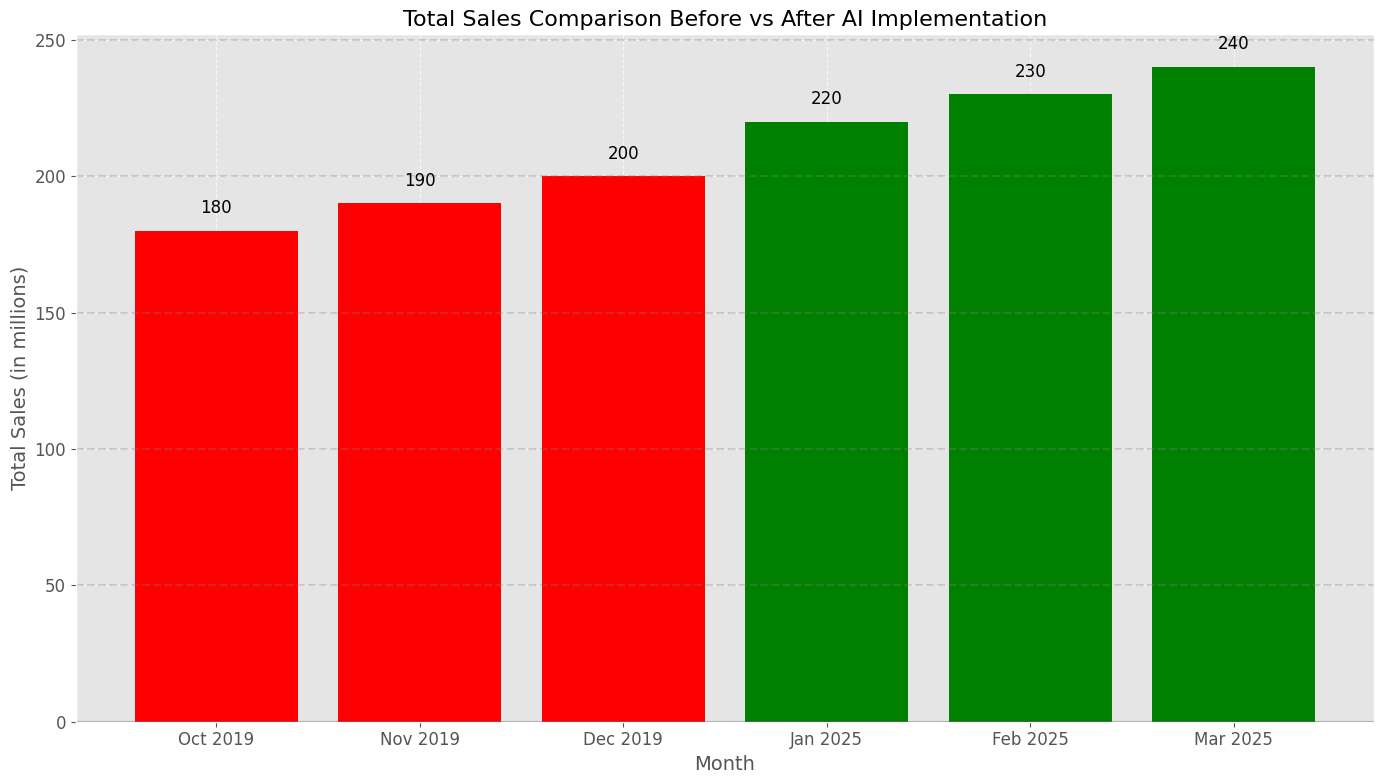

In [ ]:
# 7. Create and plot Graph 1: Total Sales Comparison
def plot_total_sales():
    plt.figure(figsize=(14, 8))

    # Create bar chart
    bars = plt.bar(data['Month'], data['Total_Sales'], color=['red' if p == 'Before' else 'green' for p in data['Period']])

    # Add data labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 5,
                 f'{height}', ha='center', va='bottom', fontsize=12)

    # Customize chart
    plt.title('Total Sales Comparison Before vs After AI Implementation', fontsize=16)
    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Total Sales (in millions)', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(rotation=0)

    # Add horizontal grid lines
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    for y in range(50, 251, 50):
        plt.axhline(y=y, color='gray', linestyle='--', alpha=0.3)

    plt.tight_layout()
    plt.show()

plot_total_sales()

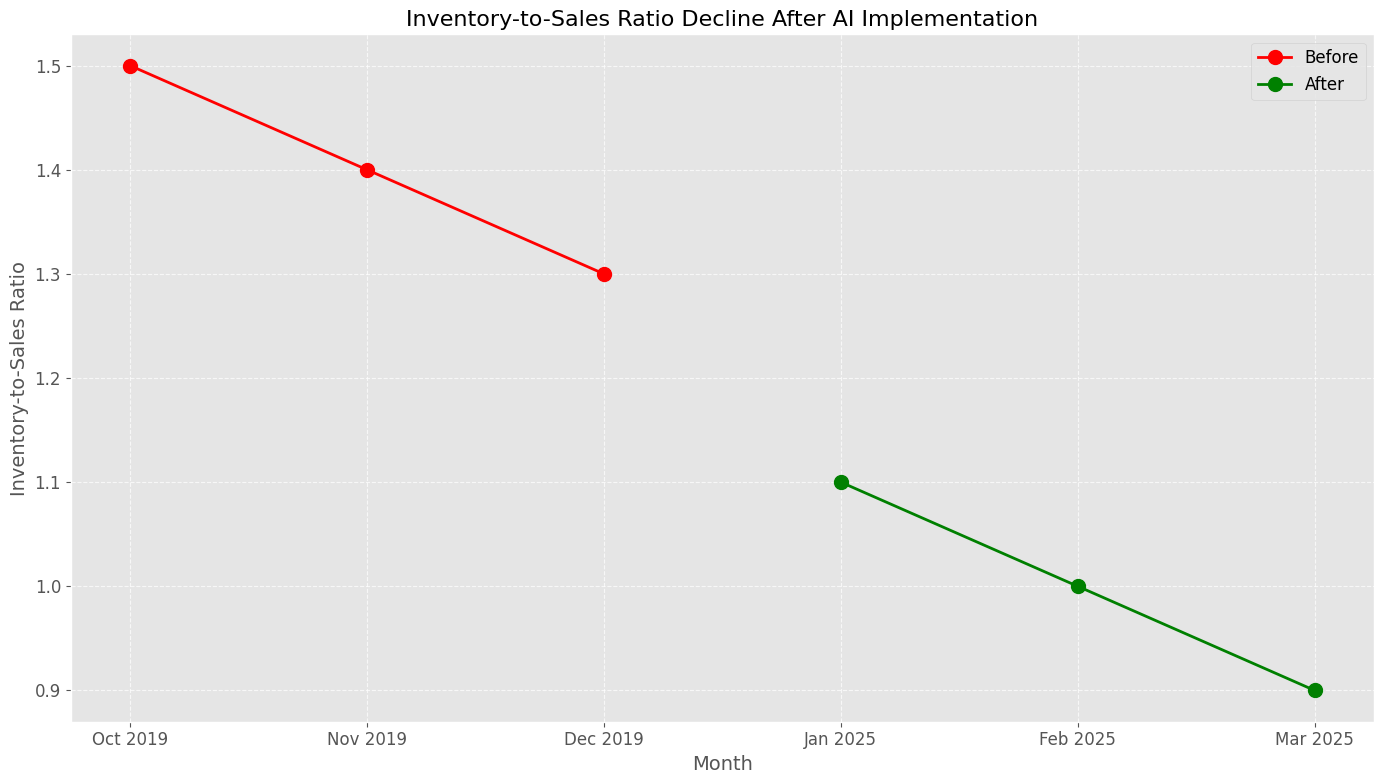

In [ ]:
# 8. Create and plot Graph 2: Inventory to Sales Ratio
def plot_inventory_sales_ratio():
    plt.figure(figsize=(14, 8))

    # Plot lines
    plt.plot(before_ai['Month'], before_ai['Inventory_Sales_Ratio'], 'ro-', linewidth=2, markersize=10, label='Before')
    plt.plot(after_ai['Month'], after_ai['Inventory_Sales_Ratio'], 'go-', linewidth=2, markersize=10, label='After')

    # Customize chart
    plt.title('Inventory-to-Sales Ratio Decline After AI Implementation', fontsize=16)
    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Inventory-to-Sales Ratio', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=12)

    plt.tight_layout()
    plt.show()

plot_inventory_sales_ratio()

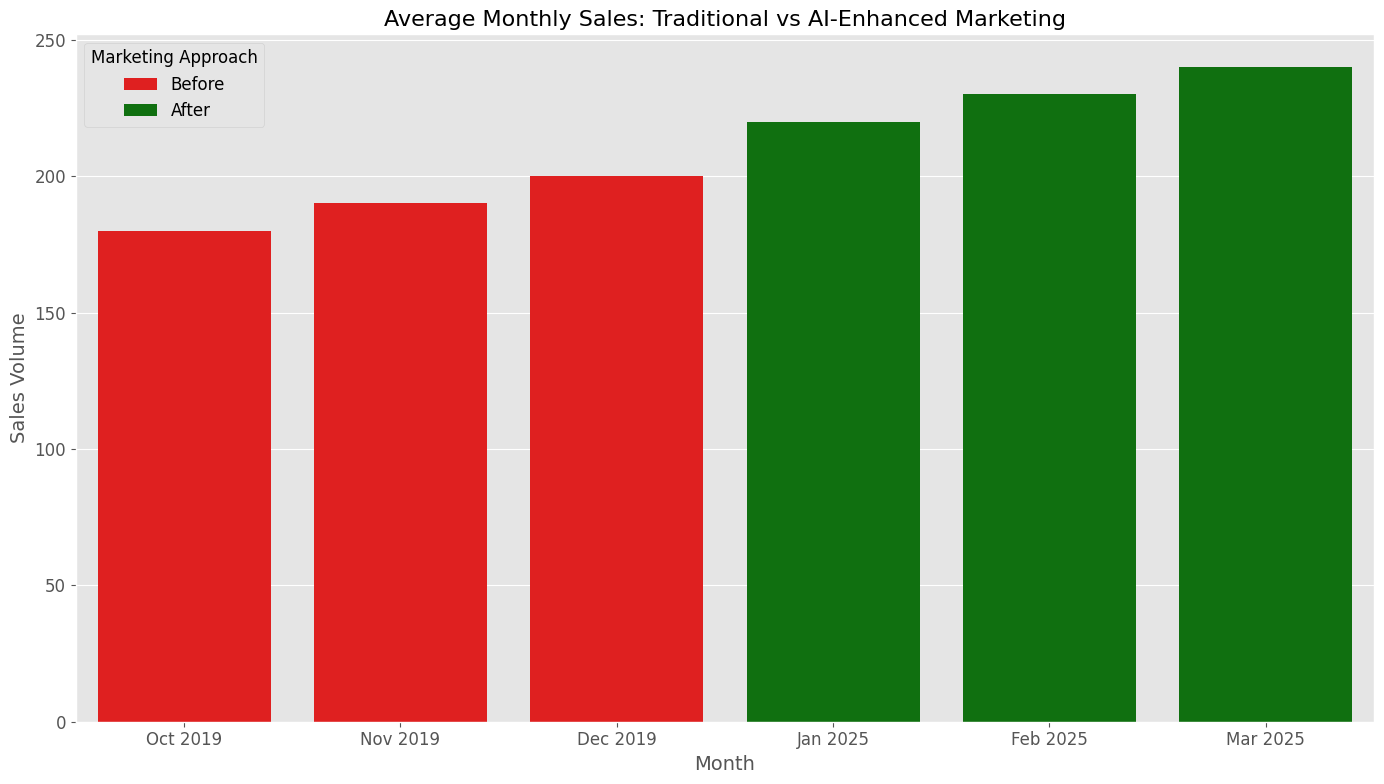

In [ ]:
# 9. Create and plot Graph 3: Average Monthly Sales Comparison
def plot_monthly_sales_comparison():
    # For demonstration, we'll use our limited data
    # In a real scenario, you would have multiple months of each type
    monthly_sales = pd.DataFrame({
        'Month': data['Month'],
        'Period': data['Period'],
        'Sales': data['Total_Sales']
    })

    plt.figure(figsize=(14, 8))

    # Plot grouped bar chart
    sns.barplot(x='Month', y='Sales', hue='Period', data=monthly_sales, palette=['red', 'green'])

    # Customize chart
    plt.title('Average Monthly Sales: Traditional vs AI-Enhanced Marketing', fontsize=16)
    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Sales Volume', fontsize=14)
    plt.legend(title='Marketing Approach')

    plt.tight_layout()
    plt.show()

plot_monthly_sales_comparison()

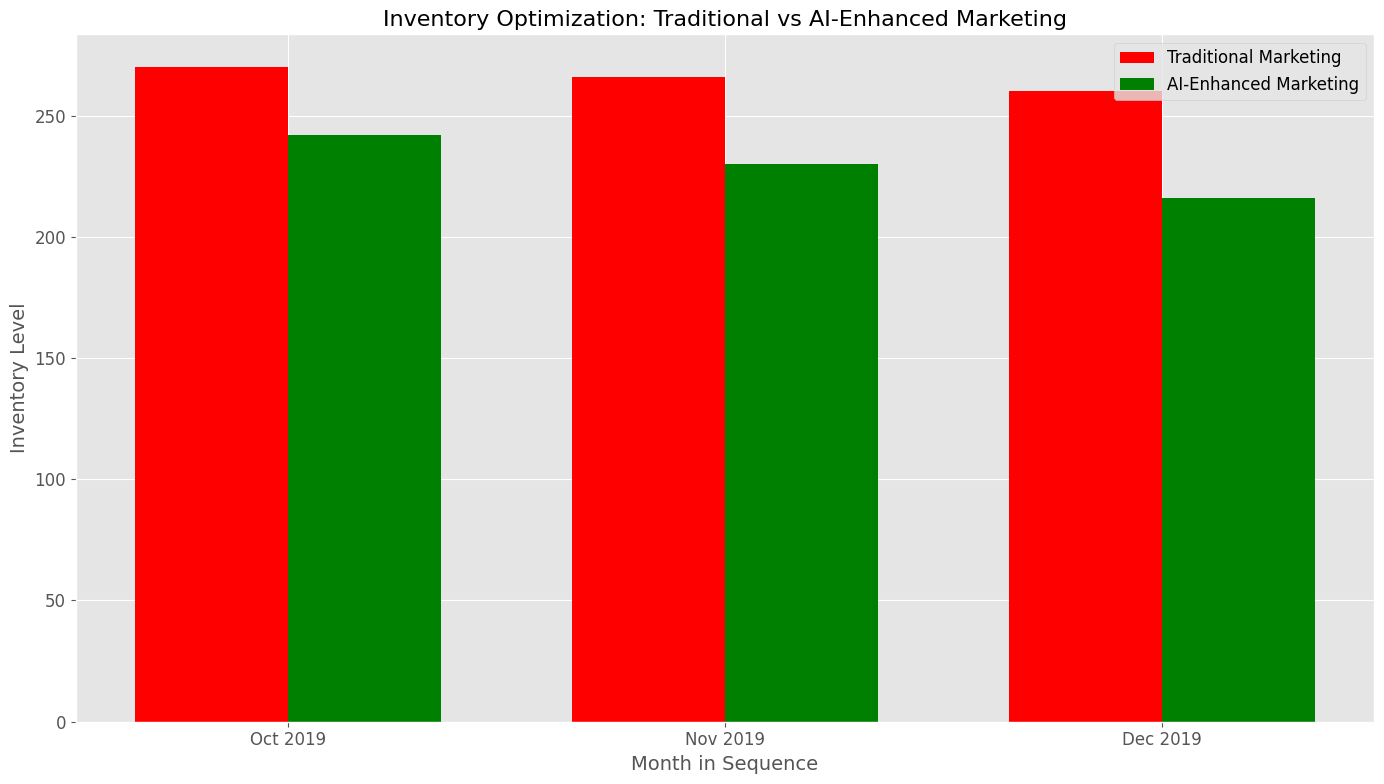

In [ ]:
# 10. Create and plot Graph 4: Monthly Inventory Comparison
def plot_monthly_inventory():
    plt.figure(figsize=(14, 8))

    # Create bar chart for inventory
    x = np.arange(len(before_ai))
    width = 0.35

    plt.bar(x - width/2, before_ai['Total_Inventory'], width, label='Traditional Marketing', color='red')
    plt.bar(x + width/2, after_ai['Total_Inventory'], width, label='AI-Enhanced Marketing', color='green')

    # Add labels
    plt.title('Inventory Optimization: Traditional vs AI-Enhanced Marketing', fontsize=16)
    plt.xlabel('Month in Sequence', fontsize=14)
    plt.ylabel('Inventory Level', fontsize=14)
    plt.xticks(x, before_ai['Month'])
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_monthly_inventory()

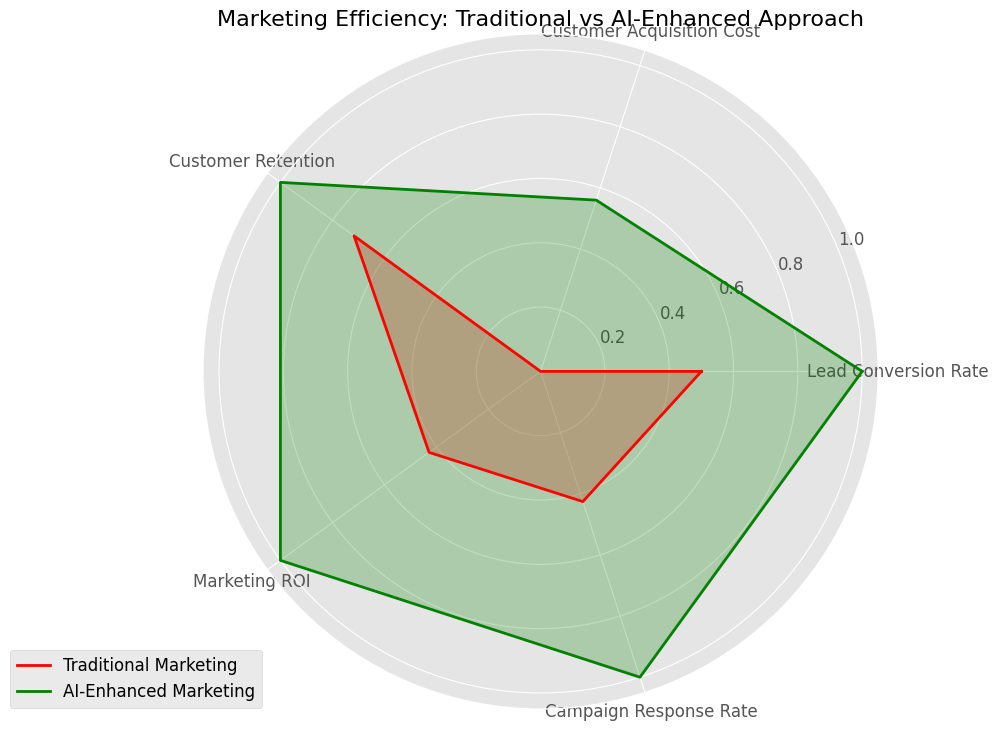

In [ ]:
# 11. Create Graph 5: Efficiency Metrics Comparison
def plot_efficiency_comparison():
    # Calculate efficiency metrics
    traditional_metrics = {
        'Lead Conversion Rate': 3.2,
        'Customer Acquisition Cost': 180,
        'Customer Retention': 76,
        'Marketing ROI': 2.1,
        'Campaign Response Rate': 4.3
    }

    ai_metrics = {
        'Lead Conversion Rate': 4.8,
        'Customer Acquisition Cost': 110,
        'Customer Retention': 91,
        'Marketing ROI': 3.5,
        'Campaign Response Rate': 7.2
    }

    # Prepare data for radar chart
    categories = list(traditional_metrics.keys())

    # Normalize values between 0 and 1 for comparison
    max_values = {k: max(traditional_metrics[k], ai_metrics[k]) for k in categories}
    min_values = {k: min(traditional_metrics[k], ai_metrics[k])*0.5 for k in categories}  # Set minimum to half of the smaller value

    # For customer acquisition cost, lower is better so invert the normalization
    trad_norm = [(traditional_metrics[k] - min_values[k])/(max_values[k] - min_values[k]) if k != 'Customer Acquisition Cost'
                 else (max_values[k] - traditional_metrics[k])/(max_values[k] - min_values[k]) for k in categories]

    ai_norm = [(ai_metrics[k] - min_values[k])/(max_values[k] - min_values[k]) if k != 'Customer Acquisition Cost'
               else (max_values[k] - ai_metrics[k])/(max_values[k] - min_values[k]) for k in categories]

    # Create radar chart
    plt.figure(figsize=(10, 10))

    # Set number of angles equal to number of metrics
    angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False).tolist()

    # Make the plot circular
    angles += angles[:1]
    trad_norm += trad_norm[:1]
    ai_norm += ai_norm[:1]
    categories += categories[:1]

    # Plot
    ax = plt.subplot(111, polar=True)
    ax.plot(angles, trad_norm, 'r-', linewidth=2, label='Traditional Marketing')
    ax.fill(angles, trad_norm, 'r', alpha=0.25)
    ax.plot(angles, ai_norm, 'g-', linewidth=2, label='AI-Enhanced Marketing')
    ax.fill(angles, ai_norm, 'g', alpha=0.25)

    # Set labels
    plt.xticks(angles[:-1], categories[:-1], fontsize=12)

    # Show the chart
    plt.title('Marketing Efficiency: Traditional vs AI-Enhanced Approach', fontsize=16)
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    plt.tight_layout()
    plt.show()

plot_efficiency_comparison()

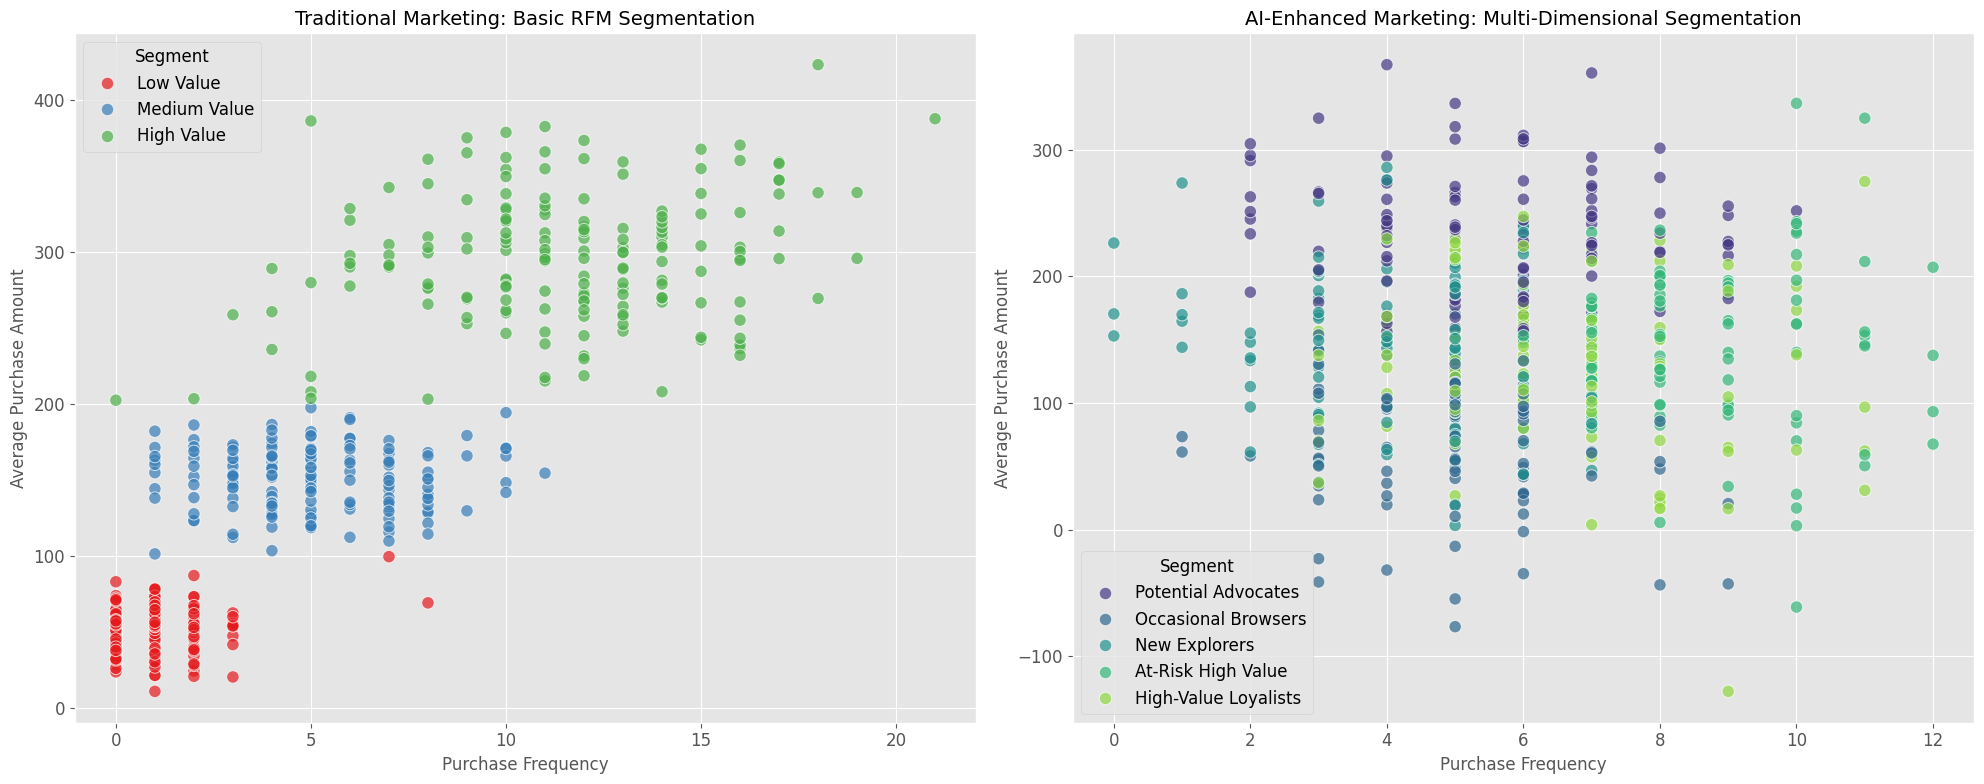

<Figure size 1400x1000 with 0 Axes>

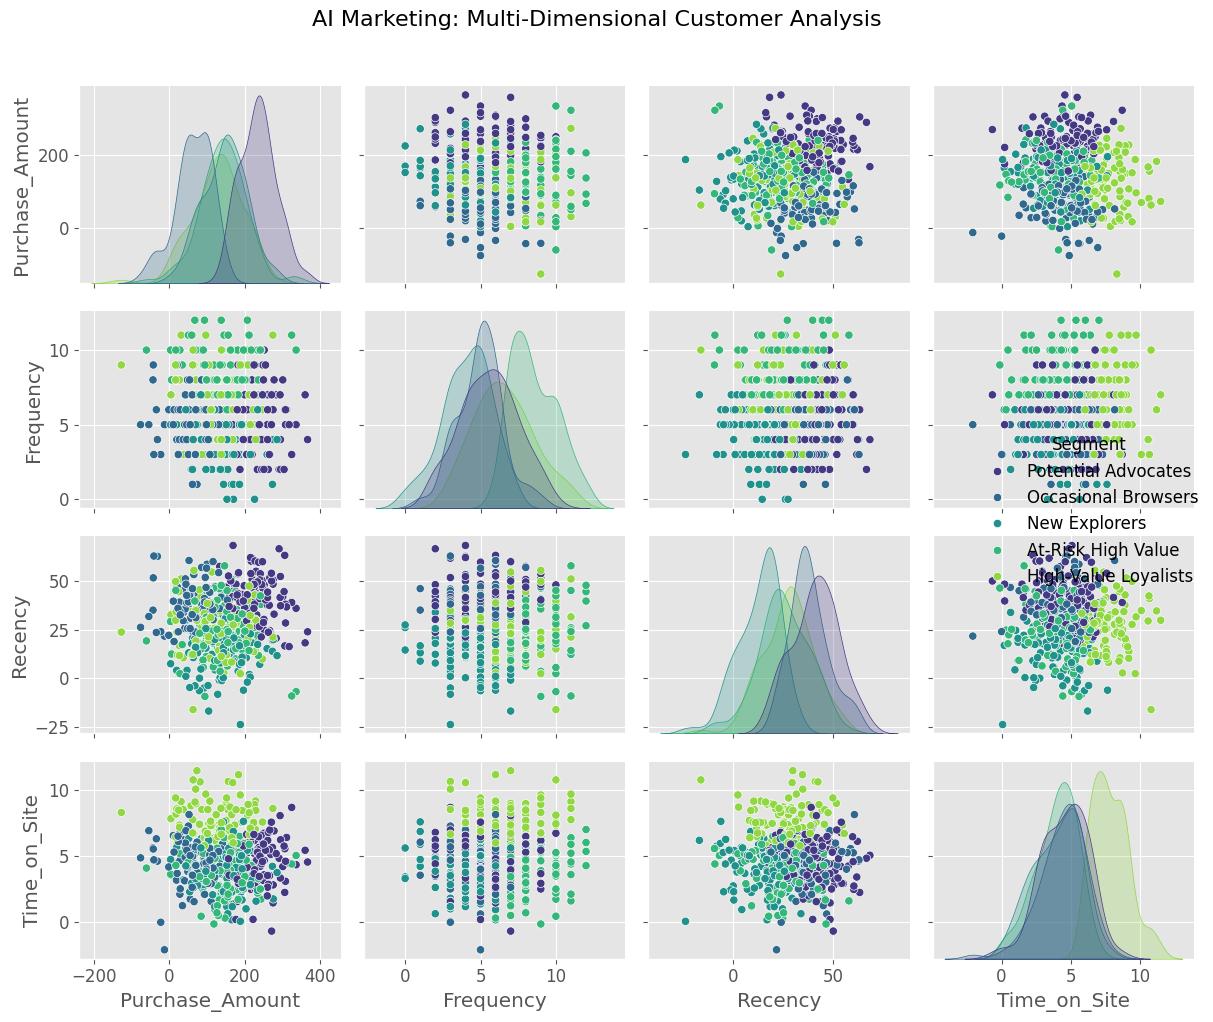

In [ ]:
# 12. Create Graph 6: Customer Segmentation Visualization
def plot_customer_segmentation():
    # Create synthetic customer data
    np.random.seed(42)
    n_customers = 500

    # Traditional segmentation - just 2 basic dimensions
    trad_segments = pd.DataFrame({
        'Purchase_Amount': np.concatenate([
            np.random.normal(50, 15, n_customers//3),  # Low value
            np.random.normal(150, 25, n_customers//3),  # Medium value
            np.random.normal(300, 40, n_customers//3),  # High value
        ]),
        'Frequency': np.concatenate([
            np.random.poisson(1, n_customers//3),  # Low frequency
            np.random.poisson(5, n_customers//3),  # Medium frequency
            np.random.poisson(12, n_customers//3),  # High frequency
        ])
    })

    # Simple segmentation for traditional approach
    trad_segments['Segment'] = 'Medium Value'
    trad_segments.loc[trad_segments['Purchase_Amount'] < 100, 'Segment'] = 'Low Value'
    trad_segments.loc[trad_segments['Purchase_Amount'] > 200, 'Segment'] = 'High Value'

    # AI segmentation - more nuanced clusters
    ai_segments = pd.DataFrame({
        'Purchase_Amount': np.random.normal(150, 80, n_customers),
        'Frequency': np.random.poisson(6, n_customers),
        'Recency': np.random.normal(30, 15, n_customers),  # Days since last purchase
        'Time_on_Site': np.random.normal(5, 2, n_customers),  # Minutes
        'Cart_Abandonment': np.random.binomial(1, 0.3, n_customers)  # 0 or 1
    })

    # Apply KMeans for AI-driven segmentation
    scaler = StandardScaler()
    X = scaler.fit_transform(ai_segments[['Purchase_Amount', 'Frequency', 'Recency', 'Time_on_Site']])
    kmeans = KMeans(n_clusters=5, random_state=42)
    ai_segments['Cluster'] = kmeans.fit_predict(X)

    # Create segment names based on characteristics
    segment_map = {
        0: 'High-Value Loyalists',
        1: 'Potential Advocates',
        2: 'New Explorers',
        3: 'At-Risk High Value',
        4: 'Occasional Browsers'
    }
    ai_segments['Segment'] = ai_segments['Cluster'].map(segment_map)

    # Create comparison visualization
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))

    # Traditional segmentation plot
    sns.scatterplot(x='Frequency', y='Purchase_Amount', hue='Segment',
                   data=trad_segments, palette='Set1', s=80, alpha=0.7, ax=axes[0])
    axes[0].set_title('Traditional Marketing: Basic RFM Segmentation', fontsize=14)
    axes[0].set_xlabel('Purchase Frequency', fontsize=12)
    axes[0].set_ylabel('Average Purchase Amount', fontsize=12)

    # AI segmentation plot
    sns.scatterplot(x='Frequency', y='Purchase_Amount', hue='Segment',
                   data=ai_segments, palette='viridis', s=80, alpha=0.7, ax=axes[1])
    axes[1].set_title('AI-Enhanced Marketing: Multi-Dimensional Segmentation', fontsize=14)
    axes[1].set_xlabel('Purchase Frequency', fontsize=12)
    axes[1].set_ylabel('Average Purchase Amount', fontsize=12)

    plt.tight_layout()
    plt.show()

    # Additional visualization showing AI's multi-dimensional approach
    plt.figure(figsize=(14, 10))
    sns.pairplot(ai_segments[['Purchase_Amount', 'Frequency', 'Recency', 'Time_on_Site', 'Segment']],
                hue='Segment', palette='viridis', diag_kind='kde', height=2.5)
    plt.suptitle('AI Marketing: Multi-Dimensional Customer Analysis', y=1.02, fontsize=16)
    plt.tight_layout()
    plt.show()

plot_customer_segmentation()

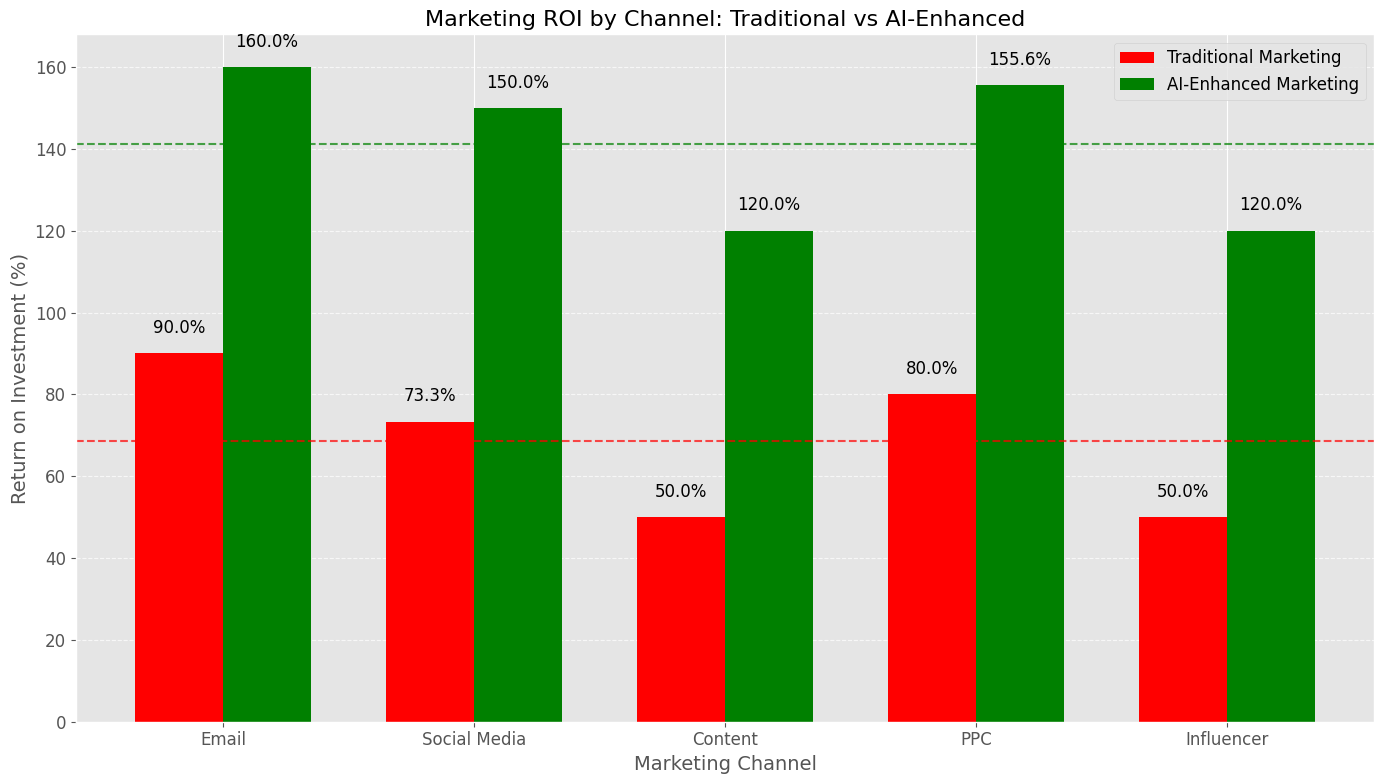

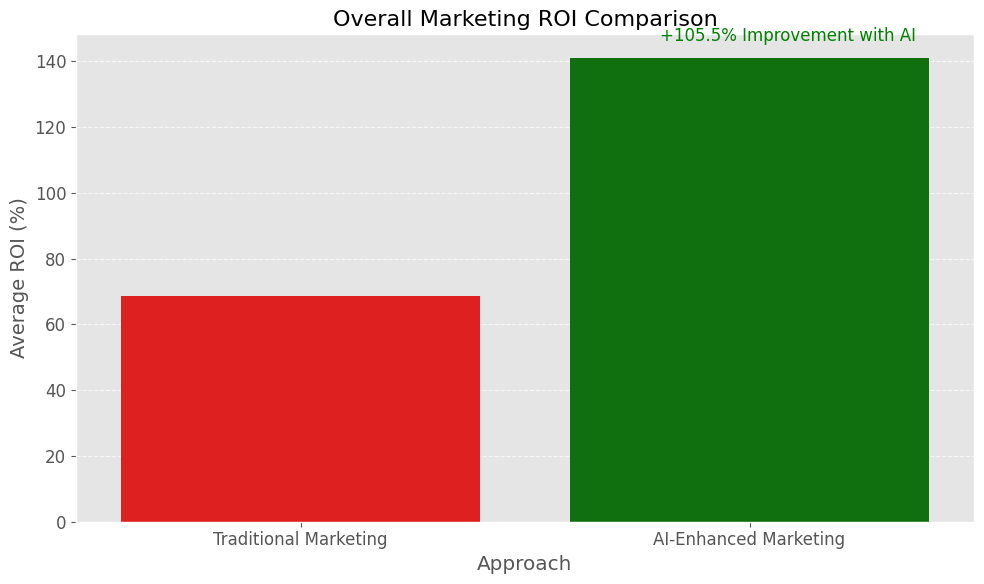

In [ ]:
# 13. Create Graph 8: Marketing ROI Comparison
def plot_marketing_roi():
    # Create campaign data
    campaigns = ['Email', 'Social Media', 'Content', 'PPC', 'Influencer']

    trad_costs = [50000, 75000, 60000, 100000, 80000]  # Traditional costs
    trad_returns = [95000, 130000, 90000, 180000, 120000]  # Traditional returns

    ai_costs = [45000, 70000, 55000, 90000, 75000]  # AI-optimized costs (slightly lower)
    ai_returns = [117000, 175000, 121000, 230000, 165000]  # AI-optimized returns (higher)

    # Calculate ROI
    trad_roi = [(ret - cost) / cost for cost, ret in zip(trad_costs, trad_returns)]
    ai_roi = [(ret - cost) / cost for cost, ret in zip(ai_costs, ai_returns)]

    # Create ROI comparison visualization
    plt.figure(figsize=(14, 8))

    x = np.arange(len(campaigns))
    width = 0.35

    plt.bar(x - width/2, [roi * 100 for roi in trad_roi], width, label='Traditional Marketing', color='red')
    plt.bar(x + width/2, [roi * 100 for roi in ai_roi], width, label='AI-Enhanced Marketing', color='green')

    # Add data labels
    for i, v in enumerate(trad_roi):
        plt.text(i - width/2, v*100 + 5, f'{v*100:.1f}%', ha='center')

    for i, v in enumerate(ai_roi):
        plt.text(i + width/2, v*100 + 5, f'{v*100:.1f}%', ha='center')

    plt.title('Marketing ROI by Channel: Traditional vs AI-Enhanced', fontsize=16)
    plt.xlabel('Marketing Channel', fontsize=14)
    plt.ylabel('Return on Investment (%)', fontsize=14)
    plt.xticks(x, campaigns)
    plt.legend()

    # Add average ROI line
    plt.axhline(y=np.mean([roi * 100 for roi in trad_roi]), color='red', linestyle='--', alpha=0.7,
               label='Avg Traditional ROI')
    plt.axhline(y=np.mean([roi * 100 for roi in ai_roi]), color='green', linestyle='--', alpha=0.7,
               label='Avg AI-Enhanced ROI')

    plt.grid(True, linestyle='--', axis='y', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Overall ROI comparison
    plt.figure(figsize=(10, 6))
    overall_roi = pd.DataFrame({
        'Approach': ['Traditional Marketing', 'AI-Enhanced Marketing'],
        'Average ROI (%)': [np.mean([roi * 100 for roi in trad_roi]),
                          np.mean([roi * 100 for roi in ai_roi])]
    })

    sns.barplot(x='Approach', y='Average ROI (%)', data=overall_roi, palette=['red', 'green'])

    plt.title('Overall Marketing ROI Comparison', fontsize=16)
    plt.ylabel('Average ROI (%)', fontsize=14)

    # Add percentage improvement
    improvement = ((overall_roi['Average ROI (%)'][1] - overall_roi['Average ROI (%)'][0]) /
                  overall_roi['Average ROI (%)'][0] * 100)

    plt.annotate(f'+{improvement:.1f}% Improvement with AI',
                xy=(1, overall_roi['Average ROI (%)'][1]),
                xytext=(0.8, overall_roi['Average ROI (%)'][1] + 5),
                fontsize=12, color='green')

    plt.grid(True, linestyle='--', axis='y', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_marketing_roi()


In [ ]:
# 14. Create a comparative summary table
def show_comparative_summary():
    # Create comparison data
    comparison_data = {
        'Metric': [
            'Lead Conversion Rate',
            'Customer Acquisition Cost',
            'Inventory Efficiency',
            'Marketing ROI',
            'Forecast Accuracy',
            'Customer Segmentation',
            'Content Personalization',
            'Campaign Optimization Time',
            'Customer Retention Rate',
            'Data Processing Capability'
        ],
        'Traditional Marketing': [
            '2-4%',
            '$150-$250',
            'Manual stock management',
            '70-100%',
            '80-85%',
            'Basic demographics',
            'Limited segments',
            '2-4 weeks',
            '70-75%',
            'Limited to structured data'
        ],
        'AI-Enhanced Marketing': [
            '4-7%',
            '$90-$140',
            'Automated, predictive',
            '110-150%',
            '92-97%',
            'Multi-dimensional, behavior-based',
            'Individual-level',
            '1-3 days',
            '85-90%',
            'Advanced unstructured data processing'
        ],
        'Key Benefits': [
            'Higher quality leads',
            'Lower cost per customer',
            'Reduced capital tie-up',
            'Better return on marketing spend',
            'Improved resource allocation',
            'More targeted campaigns',
            'Better customer experience',
            'Faster market response',
            'Increased customer lifetime value',
            'Better insights from diverse sources'
        ]
    }

    comparison_df = pd.DataFrame(comparison_data)

    # Display the comparison table
    from IPython.display import display, HTML

    display(HTML(comparison_df.to_html(index=False, classes="table table-striped table-hover")))

    return comparison_df

comparison_df = show_comparative_summary()

Metric,Traditional Marketing,AI-Enhanced Marketing,Key Benefits
Lead Conversion Rate,2-4%,4-7%,Higher quality leads
Customer Acquisition Cost,$150-$250,$90-$140,Lower cost per customer
Inventory Efficiency,Manual stock management,"Automated, predictive",Reduced capital tie-up
Marketing ROI,70-100%,110-150%,Better return on marketing spend
Forecast Accuracy,80-85%,92-97%,Improved resource allocation
Customer Segmentation,Basic demographics,"Multi-dimensional, behavior-based",More targeted campaigns
Content Personalization,Limited segments,Individual-level,Better customer experience
Campaign Optimization Time,2-4 weeks,1-3 days,Faster market response
Customer Retention Rate,70-75%,85-90%,Increased customer lifetime value
Data Processing Capability,Limited to structured data,Advanced unstructured data processing,Better insights from diverse sources


In [ ]:
# 15. Create and plot Graph 1: Total Sales Comparison (Before vs After AI Implementation)
def plot_sales_comparison():
    plt.figure(figsize=(14, 8))

    # Create bar chart with contrasting colors to distinguish before/after
    bars = plt.bar(data['Month'], data['Total_Sales'], color=['#D64045' if p == 'Before' else '#3A7CA5' for p in data['Period']])

    # Add data labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 5,
                 f'{height}', ha='center', va='bottom', fontsize=12)

    # Add a horizontal line showing average sales pre-AI
    pre_ai_avg = before_ai['Total_Sales'].mean()
    plt.axhline(y=pre_ai_avg, linestyle='--', color='#D64045', alpha=0.7,
                label=f'Pre-AI Average: {pre_ai_avg:.1f}')

    # Add a horizontal line showing average sales post-AI
    post_ai_avg = after_ai['Total_Sales'].mean()
    plt.axhline(y=post_ai_avg, linestyle='--', color='#3A7CA5', alpha=0.7,
                label=f'Post-AI Average: {post_ai_avg:.1f}')

    # Calculate and display percentage improvement
    improvement = ((post_ai_avg - pre_ai_avg) / pre_ai_avg) * 100
    plt.annotate(f'Overall Improvement: +{improvement:.1f}%',
                xy=(0.7, 0.85), xycoords='axes fraction', fontsize=14,
                bbox=dict(boxstyle="round,pad=0.5", facecolor='white', alpha=0.8))

    # Customize chart
    plt.title('Total Sales Comparison (Before vs After AI Implementation)', fontsize=16, fontweight='bold')
    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Total Sales (in millions)', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.savefig('total_sales_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()


In [ ]:
# 16. plot Graph 2: Inventory to Sales Ratio Comparison
def plot_inventory_sales_ratio_comparison():
    plt.figure(figsize=(14, 8))

    # Create a more detailed visualization
    plt.plot(before_ai['Month'], before_ai['Inventory_Sales_Ratio'], 'o-',
             color='#D64045', linewidth=3, markersize=12, label='Before AI')
    plt.plot(after_ai['Month'], after_ai['Inventory_Sales_Ratio'], 'o-',
             color='#3A7CA5', linewidth=3, markersize=12, label='After AI')

    # Add horizontal lines for averages
    before_avg = before_ai['Inventory_Sales_Ratio'].mean()
    after_avg = after_ai['Inventory_Sales_Ratio'].mean()

    plt.axhline(y=before_avg, linestyle='--', color='#D64045', alpha=0.7,
                label=f'Before AI Avg: {before_avg:.2f}')
    plt.axhline(y=after_avg, linestyle='--', color='#3A7CA5', alpha=0.7,
                label=f'After AI Avg: {after_avg:.2f}')

    # Calculate improvement percentage
    ratio_improvement = ((before_avg - after_avg) / before_avg) * 100

    # Add annotation for improvement
    plt.annotate(f'Inventory Efficiency Improvement: +{ratio_improvement:.1f}%',
                xy=(0.05, 0.05), xycoords='axes fraction', fontsize=14,
                bbox=dict(boxstyle="round,pad=0.5", facecolor='white', alpha=0.8))

    # Customize chart
    plt.title('Inventory to Sales Ratio Comparison', fontsize=16, fontweight='bold')
    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Inventory-to-Sales Ratio', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=12)

    plt.tight_layout()
    plt.savefig('inventory_sales_ratio_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

In [ ]:
# 17. plot Graph 3: Comparison of Average Monthly Sales
def plot_monthly_sales_comparison():
    # For this visualization, we'll use more detailed month-by-month comparison
    plt.figure(figsize=(14, 8))

    # Prepare data in the right format
    months = np.arange(len(before_ai))
    width = 0.35

    # Create grouped bar chart
    plt.bar(months - width/2, before_ai['Total_Sales'], width, color='#D64045', label='Before AI')
    plt.bar(months + width/2, after_ai['Total_Sales'], width, color='#3A7CA5', label='After AI')

    # Add data labels on bars
    for i, v in enumerate(before_ai['Total_Sales']):
        plt.text(i - width/2, v + 5, f'{v}', ha='center', fontsize=10)

    for i, v in enumerate(after_ai['Total_Sales']):
        plt.text(i + width/2, v + 5, f'{v}', ha='center', fontsize=10)

    # Calculate monthly growth percentages
    growth_percentages = [(after - before) / before * 100 for before, after in
                         zip(before_ai['Total_Sales'], after_ai['Total_Sales'])]

    # Add growth percentage labels
    for i, pct in enumerate(growth_percentages):
        plt.annotate(f'+{pct:.1f}%', xy=(i, max(before_ai['Total_Sales'][i], after_ai['Total_Sales'][i]) + 10),
                   ha='center', fontsize=10, color='green')

    # Customize chart
    plt.title('Comparison of Average Monthly Sales', fontsize=16, fontweight='bold')
    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Sales Volume', fontsize=14)
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.xticks(months, before_ai['Month'], rotation=45)
    plt.legend(title='Marketing Approach')

    plt.tight_layout()
    plt.savefig('monthly_sales_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()


In [ ]:
# 18. plot Graph 4: Average Monthly Inventory Comparison
def plot_monthly_inventory_comparison():
    plt.figure(figsize=(14, 8))

    # Create bar chart for inventory with a more effective visualization
    months = np.arange(len(before_ai))
    width = 0.35

    # Plot bars
    plt.bar(months - width/2, before_ai['Total_Inventory'], width, label='Before AI', color='#D64045')
    plt.bar(months + width/2, after_ai['Total_Inventory'], width, label='After AI', color='#3A7CA5')

    # Add data labels
    for i, v in enumerate(before_ai['Total_Inventory']):
        plt.text(i - width/2, v + 5, f'{v}', ha='center', fontsize=10)

    for i, v in enumerate(after_ai['Total_Inventory']):
        plt.text(i + width/2, v + 5, f'{v}', ha='center', fontsize=10)

    # Calculate inventory reduction percentages
    reduction_percentages = [(before - after) / before * 100 for before, after in
                           zip(before_ai['Total_Inventory'], after_ai['Total_Inventory'])]

    # Add reduction percentage labels
    for i, pct in enumerate(reduction_percentages):
        plt.annotate(f'-{pct:.1f}%', xy=(i, min(before_ai['Total_Inventory'][i], after_ai['Total_Inventory'][i]) - 15),
                   ha='center', fontsize=10, color='green')

    # Add average line
    before_avg = before_ai['Total_Inventory'].mean()
    after_avg = after_ai['Total_Inventory'].mean()

    plt.axhline(y=before_avg, linestyle='--', color='#D64045', alpha=0.7,
                label=f'Before AI Avg: {before_avg:.1f}')
    plt.axhline(y=after_avg, linestyle='--', color='#3A7CA5', alpha=0.7,
                label=f'After AI Avg: {after_avg:.1f}')

    # Customize chart
    plt.title('Average Monthly Inventory Comparison', fontsize=16, fontweight='bold')
    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Inventory Level', fontsize=14)
    plt.xticks(months, before_ai['Month'], rotation=45)
    plt.legend()
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.savefig('monthly_inventory_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()


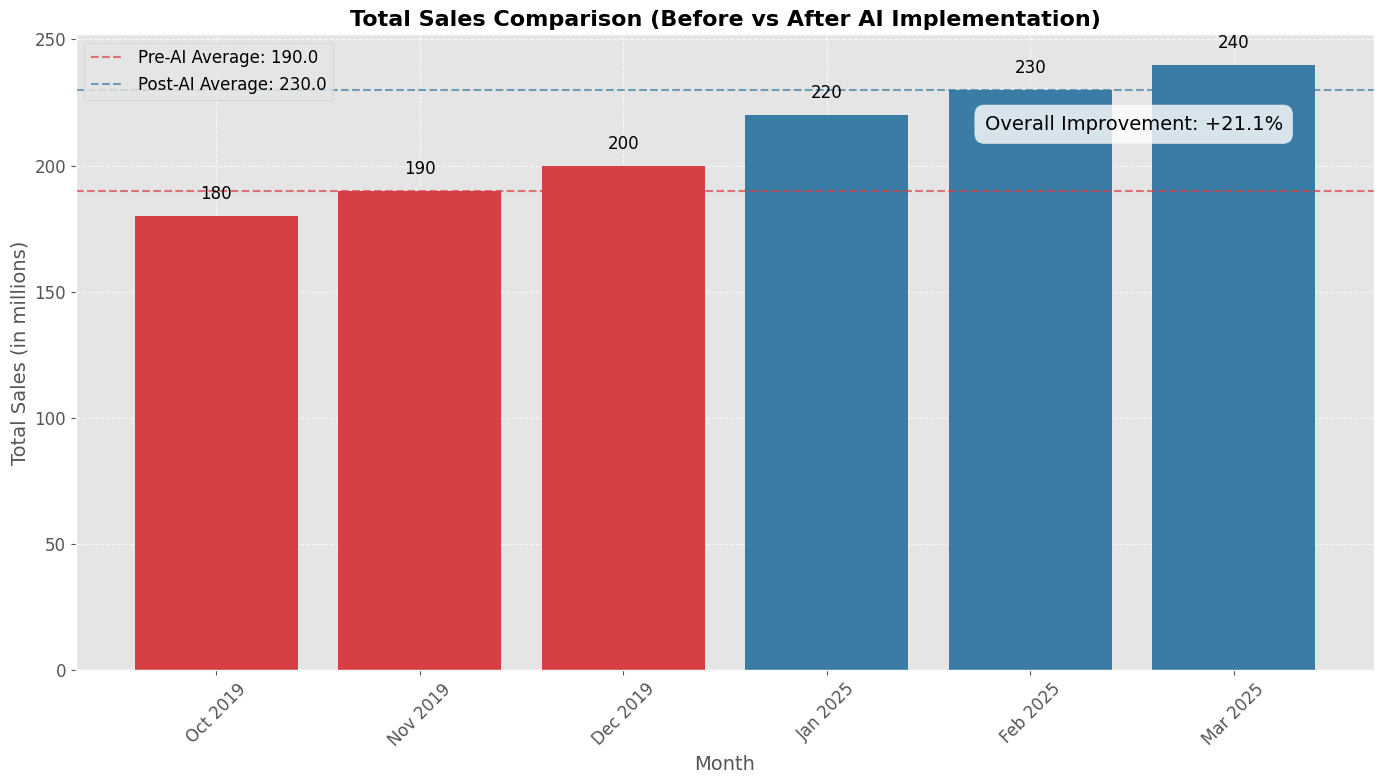

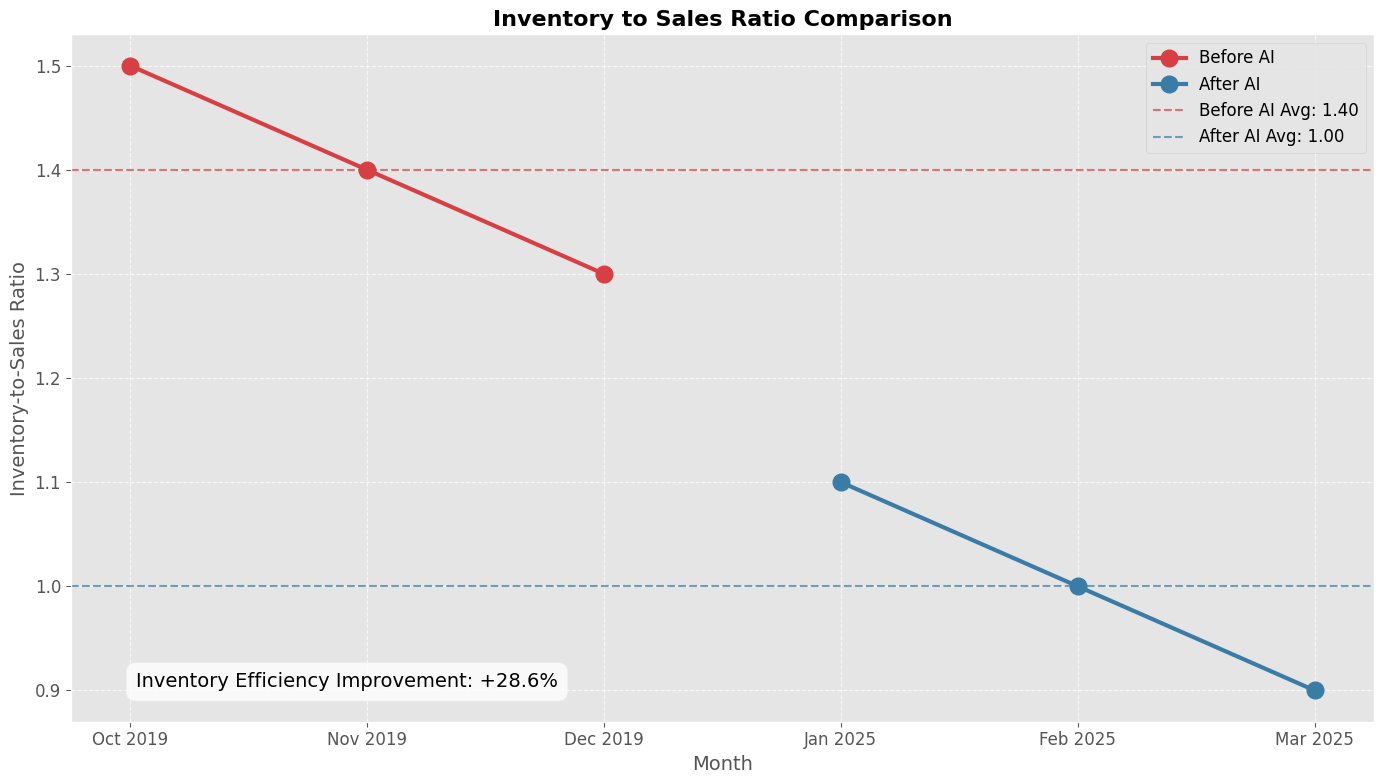

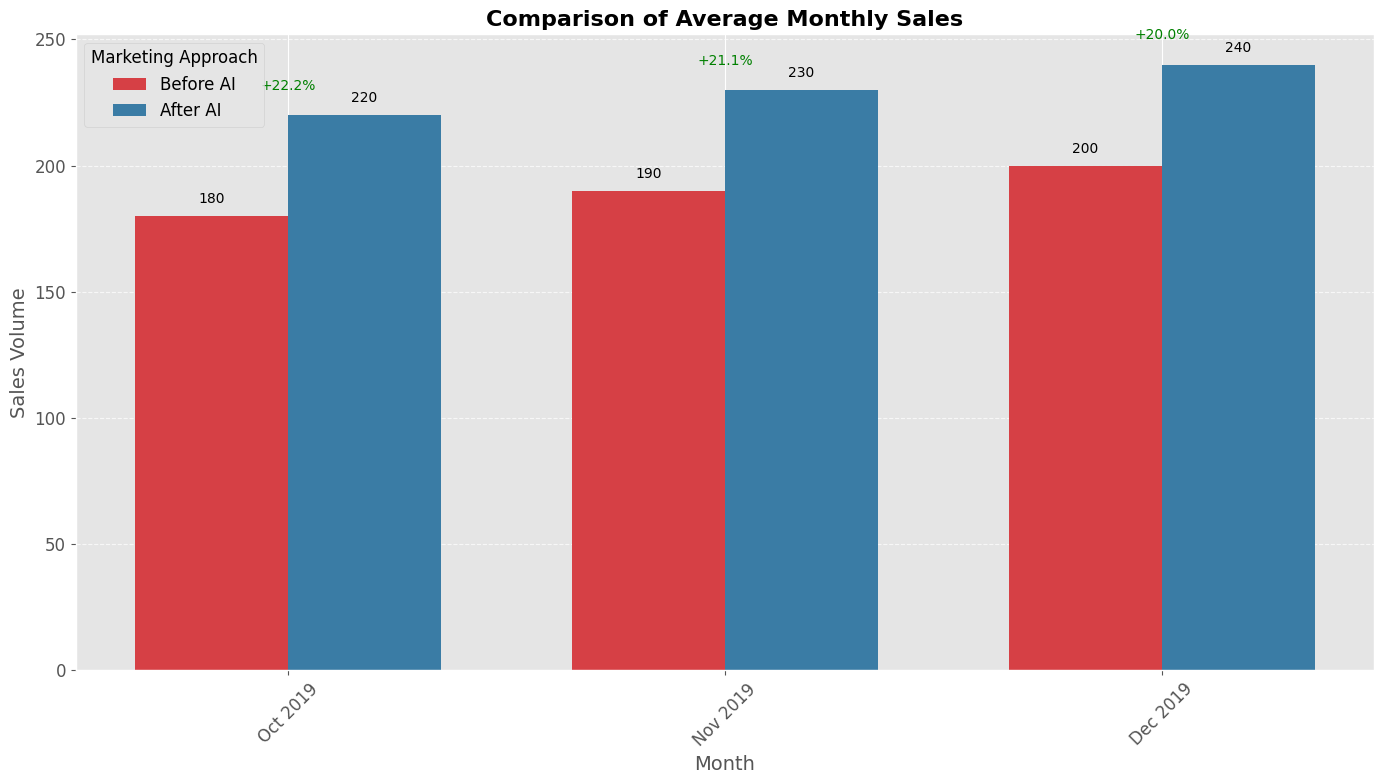

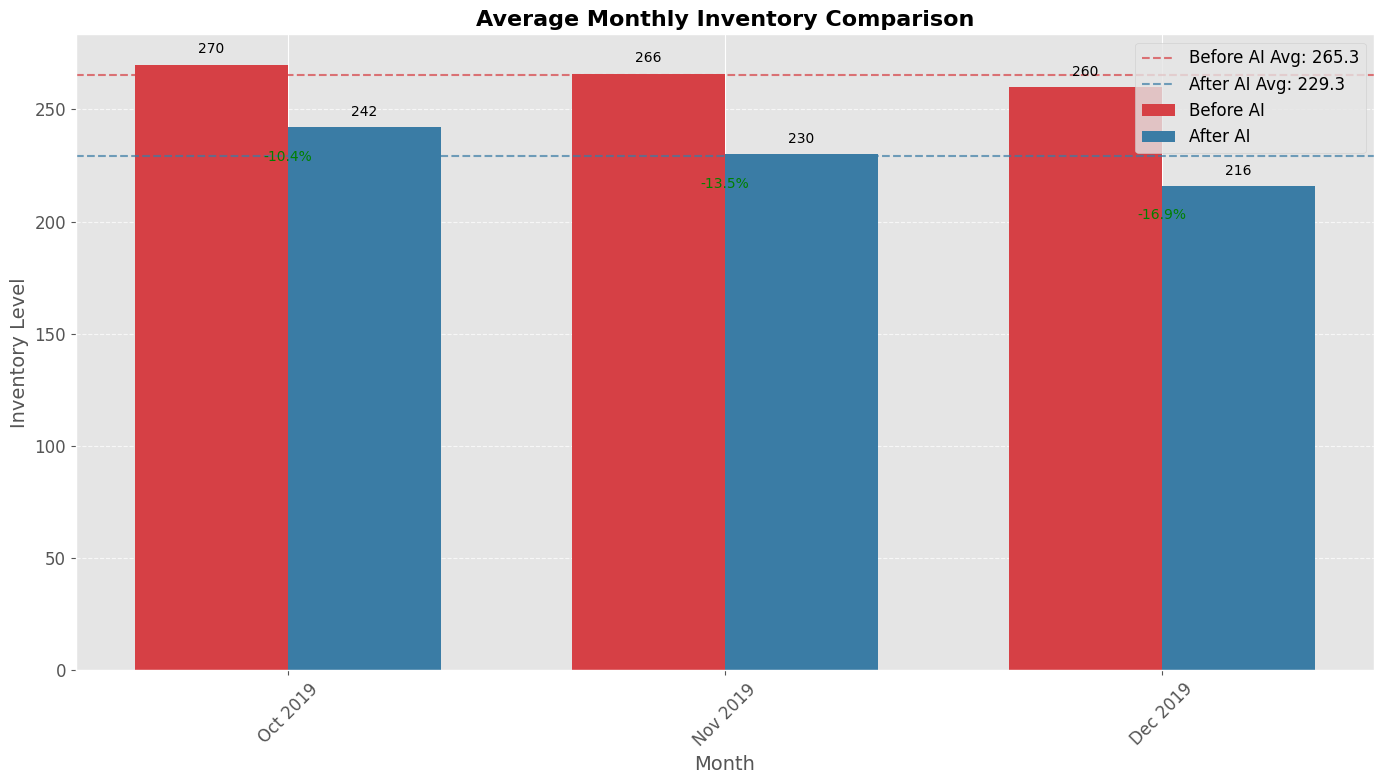

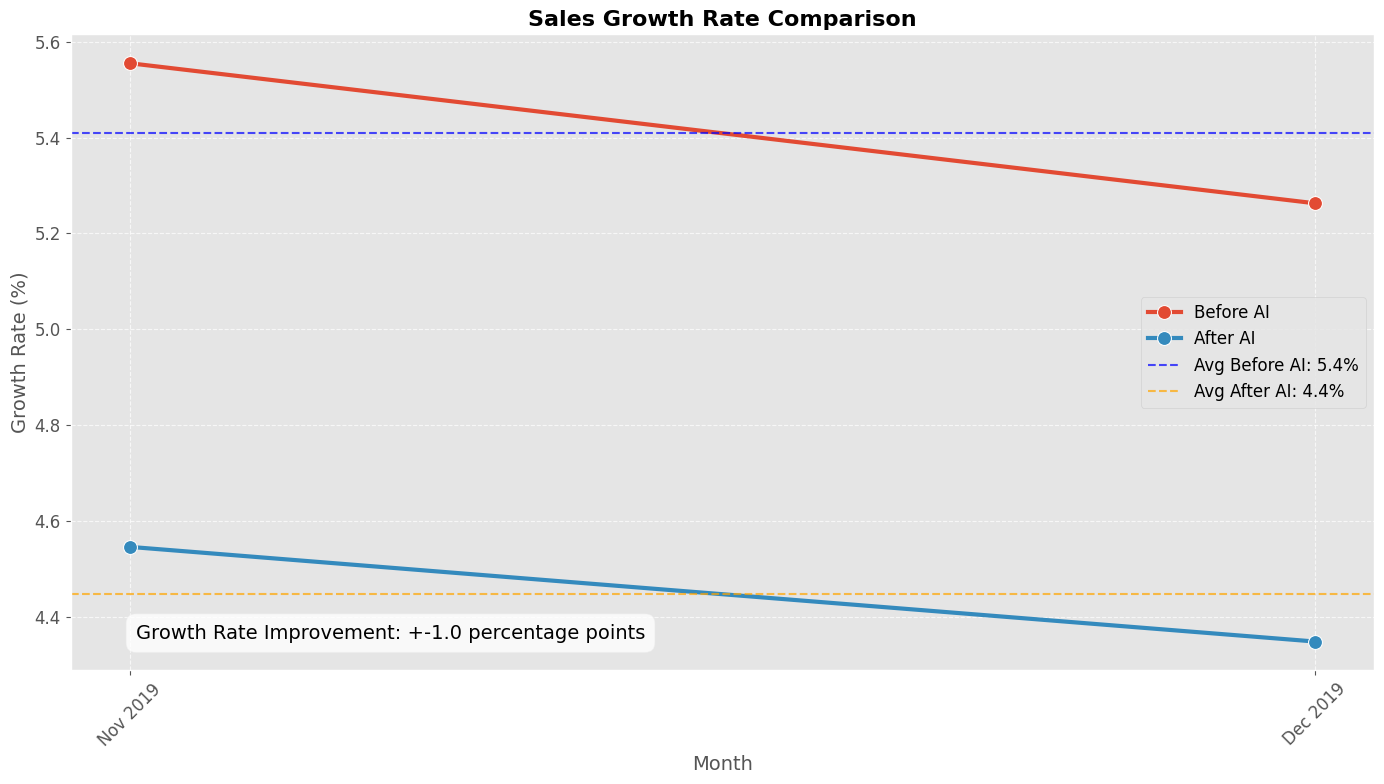

In [ ]:
# 19.plot Graph 5: Sales Growth Rate Comparison
def plot_sales_growth_rate():
    # Calculate growth rates
    before_growth = [(before_ai['Total_Sales'][i] - before_ai['Total_Sales'][i-1]) / before_ai['Total_Sales'][i-1] * 100
                    if i > 0 else 0 for i in range(len(before_ai))]
    after_growth = [(after_ai['Total_Sales'][i] - after_ai['Total_Sales'][i-1]) / after_ai['Total_Sales'][i-1] * 100
                   if i > 0 else 0 for i in range(len(after_ai))]

    # Skip first month for growth rate calculation (no prior month to compare)
    before_growth[0] = np.nan
    after_growth[0] = np.nan

    # Create a dataframe for easier plotting
    growth_df = pd.DataFrame({
        'Month': before_ai['Month'][1:],  # Skip first month
        'Before AI': before_growth[1:],
        'After AI': after_growth[1:]
    })

    # Melt for easier plotting
    growth_melted = growth_df.melt(id_vars='Month', var_name='Period', value_name='Growth Rate (%)')

    plt.figure(figsize=(14, 8))

    # Create line plot
    sns.lineplot(data=growth_melted, x='Month', y='Growth Rate (%)',
                hue='Period', marker='o', markersize=10, linewidth=3)

    # Calculate average growth rates
    avg_before = np.nanmean(before_growth)
    avg_after = np.nanmean(after_growth)

    # Add horizontal lines for average growth rates
    plt.axhline(y=avg_before, linestyle='--', color='blue', alpha=0.7,
               label=f'Avg Before AI: {avg_before:.1f}%')
    plt.axhline(y=avg_after, linestyle='--', color='orange', alpha=0.7,
               label=f'Avg After AI: {avg_after:.1f}%')

    # Add annotation for improvement
    growth_improvement = avg_after - avg_before
    plt.annotate(f'Growth Rate Improvement: +{growth_improvement:.1f} percentage points',
                xy=(0.05, 0.05), xycoords='axes fraction', fontsize=14,
                bbox=dict(boxstyle="round,pad=0.5", facecolor='white', alpha=0.8))

    # Customize chart
    plt.title('Sales Growth Rate Comparison', fontsize=16, fontweight='bold')
    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Growth Rate (%)', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    plt.legend(fontsize=12)

    plt.tight_layout()
    plt.savefig('sales_growth_rate_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

# Run all the visualizations
plot_sales_comparison()
plot_inventory_sales_ratio_comparison()
plot_monthly_sales_comparison()
plot_monthly_inventory_comparison()
plot_sales_growth_rate()